In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [168]:
df=pd.read_csv('prix_maisons.csv')

In [169]:
df.head()

,area,rooms,age,city,price
0,100,3.0,4,Casablanca,1500000
1,120,4.0,10,Casablanca,1680000
2,260,NaN,20,Casablanca,3380000
3,190,5.0,1,Casablanca,3040000
4,260,5.0,4,Casablanca,3900000


In [170]:
df.describe()

,area,rooms,age,price
count,18.00000,15.000000,18.00000,1.800000e+01
mean,165.00000,3.800000,7.00000,2.276667e+06
std,79.64997,1.207122,6.61549,9.947450e+05
min,60.00000,2.000000,1.00000,8.600000e+05
25%,100.00000,3.000000,3.00000,1.485000e+06
50%,155.00000,4.000000,4.00000,2.290000e+06
75%,260.00000,5.000000,10.00000,3.030000e+06
max,260.00000,5.000000,20.00000,3.900000e+06


In [171]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,18.0,1.650000e+02,79.649970,60.0,100.0,155.0,260.0,260.0
rooms,15.0,3.800000e+00,1.207122,2.0,3.0,4.0,5.0,5.0
age,18.0,7.000000e+00,6.615490,1.0,3.0,4.0,10.0,20.0
price,18.0,2.276667e+06,994745.016102,860000.0,1485000.0,2290000.0,3030000.0,3900000.0


In [172]:
df.isnull().sum()

area     0
rooms    3
age      0
city     0
price    0
dtype: int64

In [173]:
mean_rooms=df['rooms'].mean()

In [174]:
df['rooms'].fillna(mean_rooms, inplace=True)

C:\Users\Ousmane\AppData\Local\Temp\ipykernel_27832\2988822230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rooms'].fillna(mean_rooms, inplace=True)


In [175]:
df

,area,rooms,age,city,price
0,100,3.0,4,Casablanca,1500000
1,120,4.0,10,Casablanca,1680000
2,260,3.8,20,Casablanca,3380000
3,190,5.0,1,Casablanca,3040000
4,260,5.0,4,Casablanca,3900000
5,60,2.0,3,Casablanca,1080000
6,100,3.0,4,Marrakech,1400000
7,120,4.0,10,Marrakech,1580000
8,260,5.0,20,Marrakech,3280000
9,190,5.0,1,Marrakech,2900000


In [176]:
df['city'].value_counts()

city
Casablanca    6
Marrakech     6
Tanger        6
Name: count, dtype: int64

Text(0.5, 1.0, 'Pricing prediction based on Area')

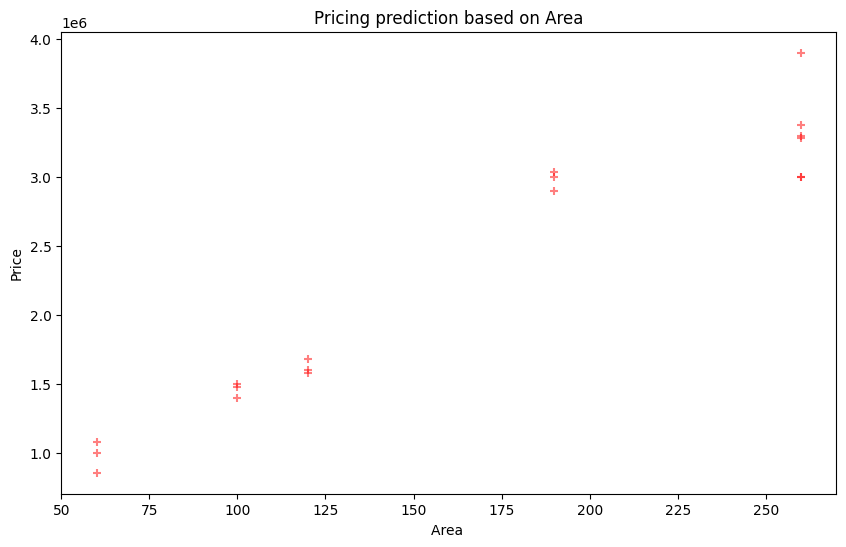

In [177]:
plt.figure(figsize=(10,6))
plt.scatter(df['area'],df['price'], alpha=0.5 , color='red',marker='+')
plt.xlabel('Area ')
plt.ylabel('Price')
plt.title('Pricing prediction based on Area')

In [178]:
df = pd.get_dummies(df, columns=['city'], drop_first=True)


In [179]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
area,100,120,260,190,260,60,100,120,260,190
rooms,3.0,4.0,3.8,5.0,5.0,2.0,3.0,4.0,5.0,5.0
age,4,10,20,1,4,3,4,10,20,1
price,1500000,1680000,3380000,3040000,3900000,1080000,1400000,1580000,3280000,2900000
city_Marrakech,False,False,False,False,False,False,True,True,True,True
city_Tanger,False,False,False,False,False,False,False,False,False,False


In [180]:
Y=df['price']
X=df.drop(['price'], axis=1)


In [181]:
X.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
area,100,120,260,190,260,60,100,120,260,190,260,60,100,120,260,190,260,60
rooms,3.0,4.0,3.8,5.0,5.0,2.0,3.0,4.0,5.0,5.0,3.8,2.0,3.0,4.0,5.0,5.0,3.8,2.0
age,4,10,20,1,4,3,4,10,20,1,4,3,4,10,20,1,4,3
city_Marrakech,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False
city_Tanger,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


In [182]:
Y.head()

0    1500000
1    1680000
2    3380000
3    3040000
4    3900000
Name: price, dtype: int64

<Axes: >

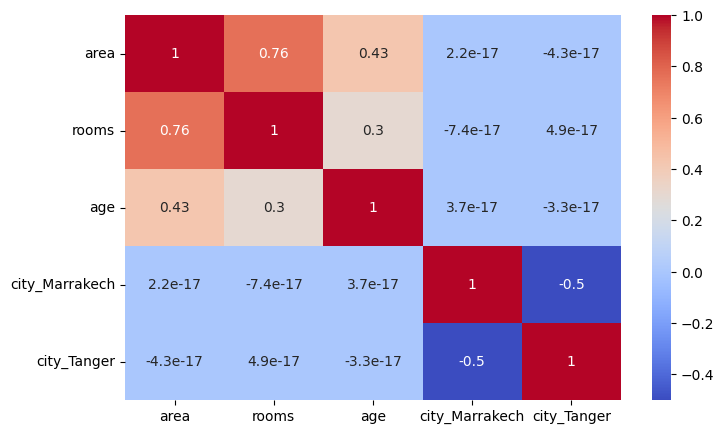

In [183]:
plt.figure(figsize=(8,5))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

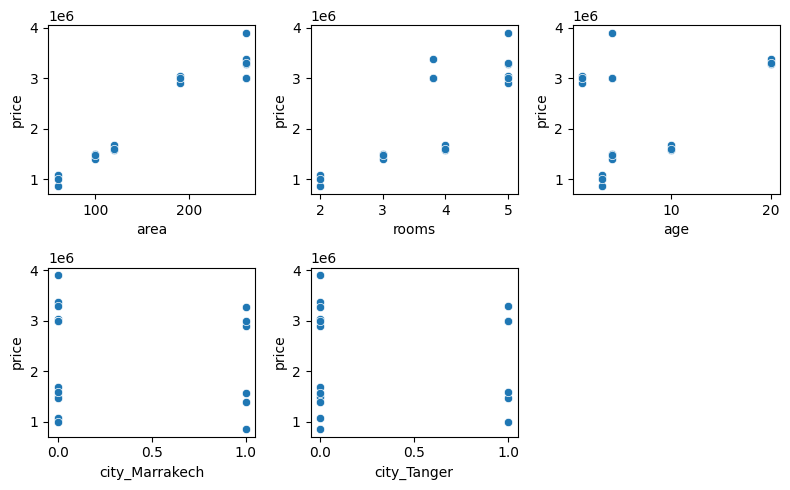

In [184]:
plt.figure(figsize=(8,5))
for col in X.columns:
    plt.subplot(2,3,X.columns.get_loc(col)+1)
    sns.scatterplot(x=X[col], y=Y)
    plt.tight_layout()
    plt.xlabel(col)

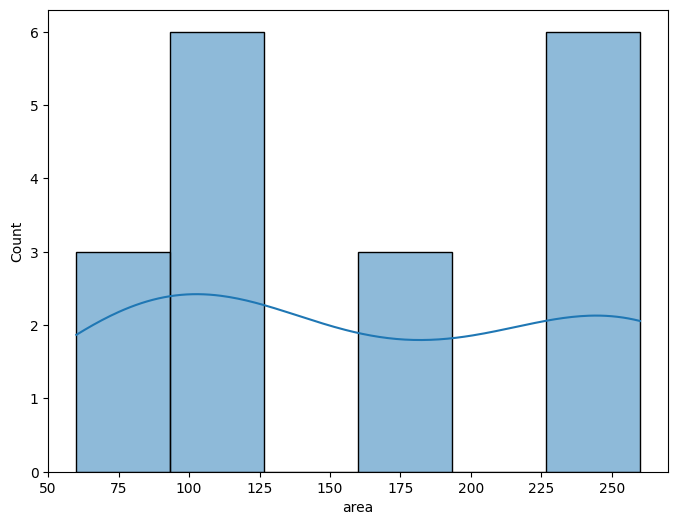

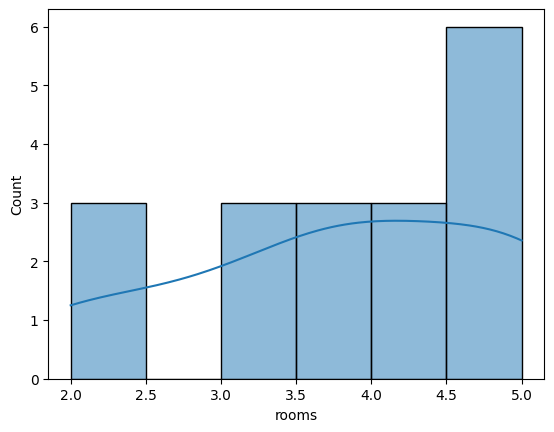

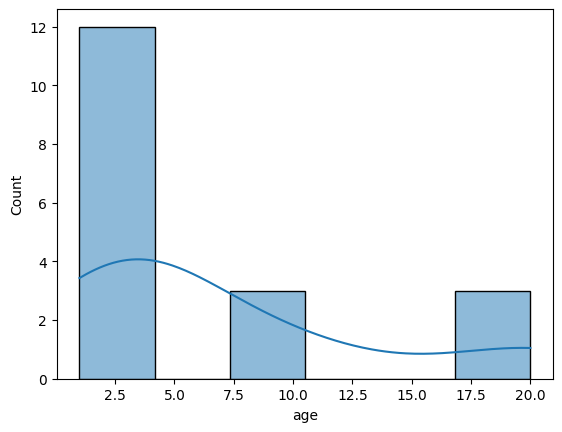

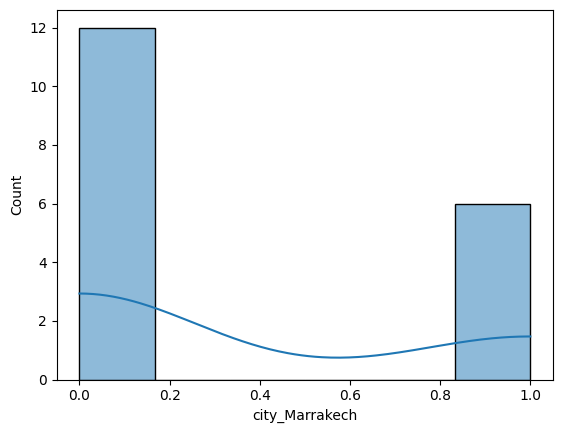

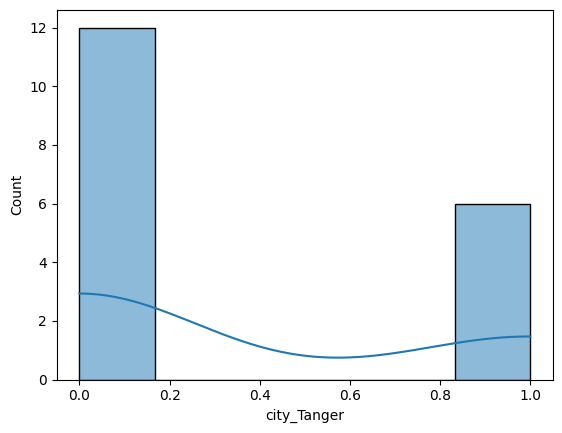

In [185]:
plt.figure(figsize=(8,6))
for col in X.columns:
    sns.histplot(X[col], kde=True)
    plt.xlabel(col)
    plt.show()

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [187]:
model=LinearRegression()

In [188]:
model.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [189]:
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [190]:
metrics.r2_score(Y_train, y_pred)

0.9837192205431742

In [191]:
metrics.r2_score(Y_test, y_pred_test)

0.8485823363826949

In [192]:
coeff=model.coef_
intercept=model.intercept_
print("Coefficients:", coeff)
print("Intercept:", intercept)

Coefficients: [   9429.78572805  230948.24519039  -14977.24593588 -455757.08634012
 -369409.75458544]
Intercept: 270732.49928522157


In [203]:
age_mean = X['age'].mean()

print("Âge moyen des maisons :", age_mean)

Âge moyen des maisons : 7.0


In [197]:
X.columns.tolist()

['area', 'rooms', 'age', 'city_Marrakech', 'city_Tanger']

In [202]:
new_house = pd.DataFrame({
    'area': [2500],
    'rooms': [4],
    'age': [8],
    'city_Marrakech': [0],
    'city_Tanger': [1]
})

price = model.predict(new_house)
print("Prix prédit :", price[0])

Prix prédit : 24279762.0780936
